In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
multiple = pd.read_csv('results_multiple.csv', index_col=False)
multiple

,Unnamed: 0,model,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8
0,0,unetfpn,0.613715,0.716680,0.772666,0.739262,0.555154,0.536602,0.609969,0.572866,0.500849,0.768117,0.669278,0.687476,0.467498,0.412280,0.495491,0.527771
1,1,unetfpnsum,0.586274,0.700842,0.762419,0.743512,0.565287,0.501125,0.265060,0.564888,0.481870,0.759707,0.658747,0.696755,0.475892,0.350031,0.221503,0.537790
2,2,unetfpnconcat,0.597174,0.793900,0.720889,0.723303,0.537022,0.743719,0.524205,0.524649,0.445360,0.748130,0.606961,0.669890,0.421214,0.715044,0.448237,0.533935
3,3,fcnfpn,0.006970,0.607533,0.690099,0.565648,0.606481,0.397028,0.423944,0.270645,0.002984,0.688235,0.609085,0.529553,0.496193,0.291346,0.349365,0.192907


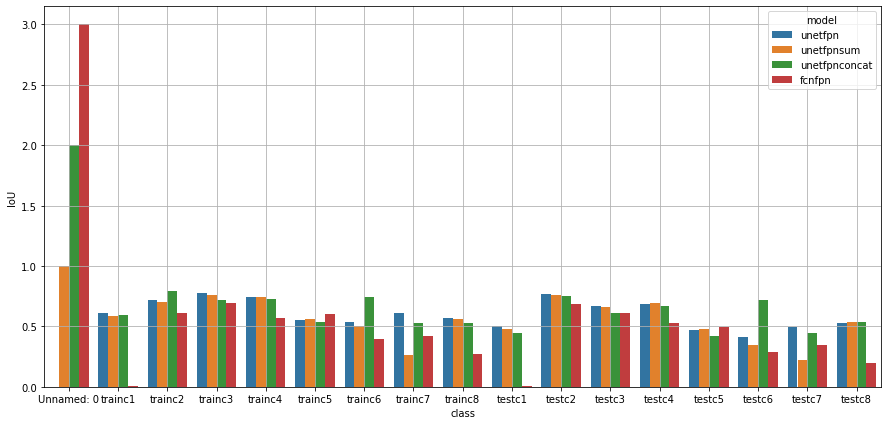

In [8]:
fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=multiple.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [23]:
multiple.iloc[:,2:10]

,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8
0,0.613715,0.716680,0.772666,0.739262,0.555154,0.536602,0.609969,0.572866
1,0.586274,0.700842,0.762419,0.743512,0.565287,0.501125,0.265060,0.564888
2,0.597174,0.793900,0.720889,0.723303,0.537022,0.743719,0.524205,0.524649
3,0.006970,0.607533,0.690099,0.565648,0.606481,0.397028,0.423944,0.270645


In [24]:
multiple.iloc[:,10:]

,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8
0,0.500849,0.768117,0.669278,0.687476,0.467498,0.412280,0.495491,0.527771
1,0.481870,0.759707,0.658747,0.696755,0.475892,0.350031,0.221503,0.537790
2,0.445360,0.748130,0.606961,0.669890,0.421214,0.715044,0.448237,0.533935
3,0.002984,0.688235,0.609085,0.529553,0.496193,0.291346,0.349365,0.192907


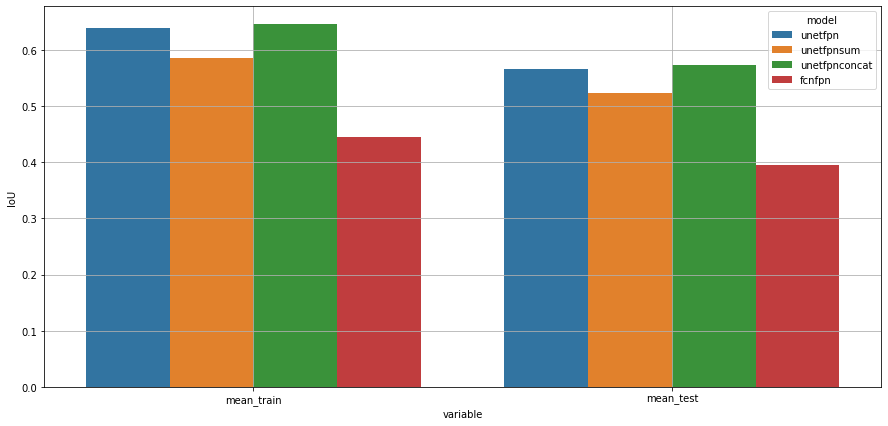

In [25]:
mean_results = multiple.copy()
mean_results['mean_train'] = multiple.iloc[:,2:10].mean(axis=1)
mean_results['mean_test'] = multiple.iloc[:,10:].mean(axis=1)
mean_results = mean_results[['mean_train', 'mean_test', 'model']]

fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=mean_results.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
# ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [26]:
mean_results

,mean_train,mean_test,model
0,0.639614,0.566095,unetfpn
1,0.586176,0.522787,unetfpnsum
2,0.645608,0.573596,unetfpnconcat
3,0.446044,0.394958,fcnfpn
